In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
funnel= pd.read_excel('AssignmentData.xlsx',index_col='Date',parse_dates=True)

In [3]:
funnel.head()

,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
Date,,,,,,
2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725
2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500
2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,NaN


In [4]:
funnel.tail()

,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
Date,,,,,,
2015-11-03 00:00:00,Q2,Finishing,0.75,960,8.0,0.628333
2015-11-03 00:00:00,Q2,Finishing,0.70,960,8.0,NaN
2015-11-03 00:00:00,Q2,Finishing,0.65,960,8.0,0.625625
2015-11-03 00:00:00,Q2,Finishing,0.75,1800,15.0,0.505889
2015-11-03 00:00:00,Q2,Finishing,0.70,720,6.0,0.394722


In [5]:
funnel.shape

(1197, 6)

In [6]:
funnel.describe()

,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
count,1197.000000,1197.000000,1197.000000,1167.000000
mean,0.729632,4567.460317,34.609858,0.734882
std,0.097891,3348.823563,22.197687,0.174629
min,0.070000,0.000000,2.000000,0.233705
25%,0.700000,1440.000000,9.000000,0.650272
50%,0.750000,3960.000000,34.000000,0.773333
75%,0.800000,6960.000000,57.000000,0.850176
max,0.800000,25920.000000,89.000000,1.120437


In [7]:
funnel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1197 entries, 2015-01-01 00:00:00 to 2015-11-03 00:00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Quarter                1197 non-null   object 
 1   Department             1197 non-null   object 
 2   Targeted Productivity  1197 non-null   float64
 3   Overtime               1197 non-null   int64  
 4   No. of Workers         1197 non-null   float64
 5   Actual Productivity    1167 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 65.5+ KB


In [8]:
funnel.isna().sum()

Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      30
dtype: int64

In [9]:
funnel.duplicated().sum()

180

In [11]:
funnel['Actual Productivity'].mean()

0.7348818812733504

<Axes: xlabel='Date'>

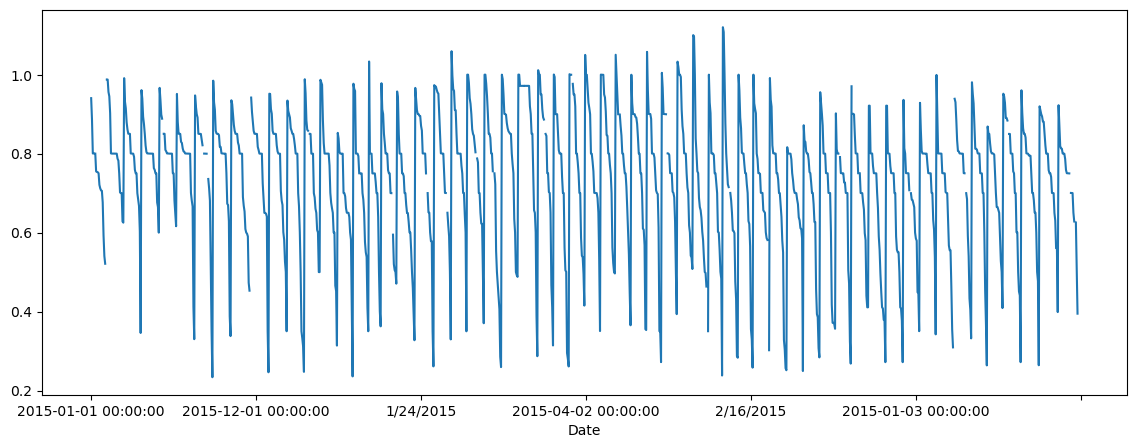

In [12]:
funnel['Actual Productivity'].plot(figsize=(14,5))

<Axes: >

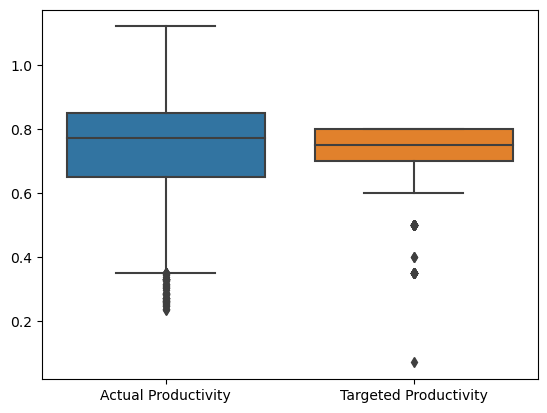

In [13]:
sns.boxplot(funnel[['Actual Productivity','Targeted Productivity']])

In [14]:
funnel=funnel.dropna()

In [15]:
funnel['Target Achieved'] = funnel.apply(lambda row: 'Yes' if row['Actual Productivity'] > row['Targeted Productivity'] else 'No', axis=1)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3960\49923524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funnel['Target Achieved'] = funnel.apply(lambda row: 'Yes' if row['Actual Productivity'] > row['Targeted Productivity'] else 'No', axis=1)


In [16]:
funnel

,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
Date,,,,,,,
2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725,Yes
2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500,Yes
2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
2015-01-01 00:00:00,Q1,Sewing,0.80,6720,56.0,0.800125,Yes
...,...,...,...,...,...,...,...
2015-11-03 00:00:00,Q2,Sewing,0.65,6840,57.0,0.650596,Yes
2015-11-03 00:00:00,Q2,Finishing,0.75,960,8.0,0.628333,No
2015-11-03 00:00:00,Q2,Finishing,0.65,960,8.0,0.625625,No


In [17]:
total_overtime_by_department = funnel.groupby('Department')['Overtime'].sum()
average_workers_per_quarter = funnel.groupby('Quarter')['No. of Workers'].mean()
total_productivity_per_quarter = (funnel['Actual Productivity'] * funnel['No. of Workers']).groupby(funnel['Quarter']).sum()
print("Summary of Results:")
print("===================")
print("Total Overtime by Department:")
print(total_overtime_by_department)
print("\nAverage Number of Workers per Quarter:")
print(average_workers_per_quarter)
print("\nTotal Productivity per Quarter:")
print(total_productivity_per_quarter)

Summary of Results:
Total Overtime by Department:
Department
Finishing     958440
Sewing       4355180
Name: Overtime, dtype: int64

Average Number of Workers per Quarter:
Quarter
Q1    34.730769
Q2    33.914373
Q3    36.036585
Q4    33.948133
Q5    32.348837
Name: No. of Workers, dtype: float64

Total Productivity per Quarter:
Quarter
Q1    9177.835208
Q2    8132.197522
Q3    5120.901458
Q4    5806.363014
Q5    1094.442487
dtype: float64


In [18]:
funnel.columns

Index(['Quarter', 'Department', 'Targeted Productivity', 'Overtime',
       'No. of Workers', 'Actual Productivity', 'Target Achieved'],
      dtype='object')

In [19]:
grouped = funnel.groupby(["Quarter", "Target Achieved"]).size().unstack()

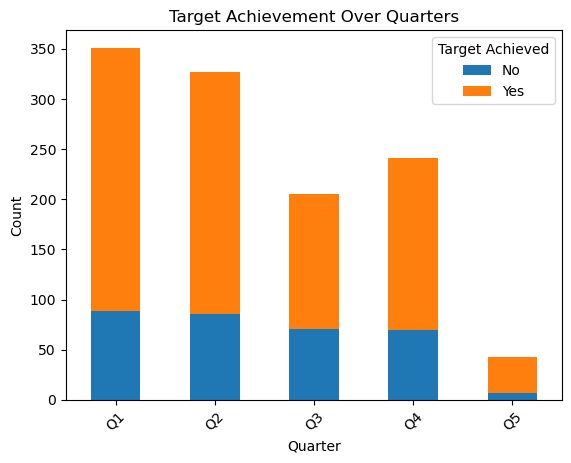

In [20]:
grouped.plot(kind="bar", stacked=True)
plt.title("Target Achievement Over Quarters")
plt.xlabel("Quarter")
plt.ylabel("Count")
plt.legend(title="Target Achieved")
plt.xticks(rotation=45)
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag="AIC")
    print("1. ABF :",dftest[0])
    print("2. P-value",dftest[1])
    print('3. NO. of lags',dftest[2])
    print('4. NO. of observations used for regression and critical values and calucation :',dftest[3])
    print("5. critical value",dftest[4])
    for key, val in dftest[4].items():
        print('\t',key,":",val)

In [23]:
ad_test(funnel["Actual Productivity"])

1. ABF : -4.00823207506292
2. P-value 0.0013680138417470665
3. NO. of lags 21
4. NO. of observations used for regression and critical values and calucation : 1145
5. critical value {'1%': -3.4360740356772745, '5%': -2.864067535683479, '10%': -2.5681157233843748}
	 1% : -3.4360740356772745
	 5% : -2.864067535683479
	 10% : -2.5681157233843748


In [42]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
from pmdarima import auto_arima

In [26]:
stepwise_fit = auto_arima(funnel['Actual Productivity'],Trace=True, suppress_warnings=True)
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1167
Model:               SARIMAX(1, 1, 2)   Log Likelihood                 664.735
Date:                Sun, 17 Mar 2024   AIC                          -1319.471
Time:                        03:49:05   BIC                          -1294.164
Sample:                             0   HQIC                         -1309.924
                               - 1167                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    3.01e-06      0.000      0.020      0.984      -0.000       0.000
ar.L1          0.5249      0.062      8.423      0.000       0.403       0.647
ma.L1         -0.8597      0.085    -10.128      0.000      -1.026      -0.693
ma.L2         -0.1240      0.082     -1.517      0.129      -0.284       0.036
sigma2         0.0195      0.001     27.815      0.000       0.018       0.021
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2627.24
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             1.82
Prob(H) (two-sided):                  0.08   Kurtosis:                         9.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
print(funnel.shape)
train = funnel.iloc[:-30]
test = funnel.iloc[-30:]
print(train.shape,test.shape)

(1167, 7)
(1137, 7) (30, 7)


In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
model = ARIMA(funnel['Actual Productivity'], order=(1,1,2))
arima_model = model.fit()
forecast_arima = arima_model.forecast(steps=4)

In [30]:
start = len(train)
end= len(train)+len(test)-1
pred = arima_model.predict(start=start,end=end,typ='levels')
print(pred)

Date
2015-10-03 00:00:00    0.729887
2015-10-03 00:00:00    0.703844
2015-10-03 00:00:00    0.706088
2015-10-03 00:00:00    0.705718
2015-10-03 00:00:00    0.672778
2015-10-03 00:00:00    0.662790
2015-10-03 00:00:00    0.617576
2015-10-03 00:00:00    0.621484
2015-11-03 00:00:00    0.514143
2015-11-03 00:00:00    0.868782
2015-11-03 00:00:00    0.803795
2015-11-03 00:00:00    0.774184
2015-11-03 00:00:00    0.773274
2015-11-03 00:00:00    0.773131
2015-11-03 00:00:00    0.765311
2015-11-03 00:00:00    0.766019
2015-11-03 00:00:00    0.766118
2015-11-03 00:00:00    0.757468
2015-11-03 00:00:00    0.740136
2015-11-03 00:00:00    0.736430
2015-11-03 00:00:00    0.736683
2015-11-03 00:00:00    0.736599
2015-11-03 00:00:00    0.736623
2015-11-03 00:00:00    0.704091
2015-11-03 00:00:00    0.707076
2015-11-03 00:00:00    0.706591
2015-11-03 00:00:00    0.673893
2015-11-03 00:00:00    0.662152
2015-11-03 00:00:00    0.661277
2015-11-03 00:00:00    0.582283
Name: predicted_mean, dtype: float6

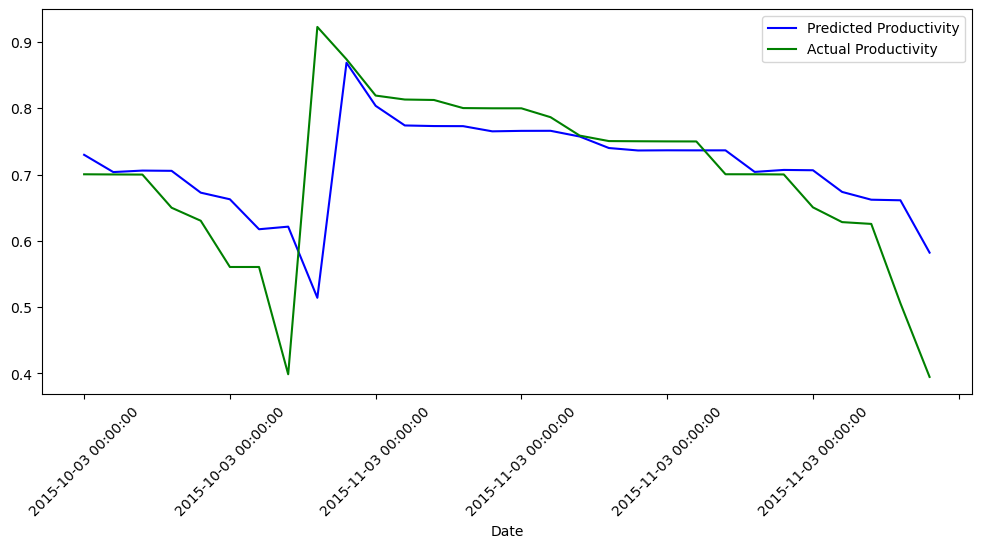

In [31]:
plt.figure(figsize=(12, 5))
pred.plot(label='Predicted Productivity', color='blue')
test['Actual Productivity'].plot( label='Actual Productivity', color='green')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [32]:
rolling_avg = funnel['Actual Productivity'].rolling(window=4).mean().iloc[-1]

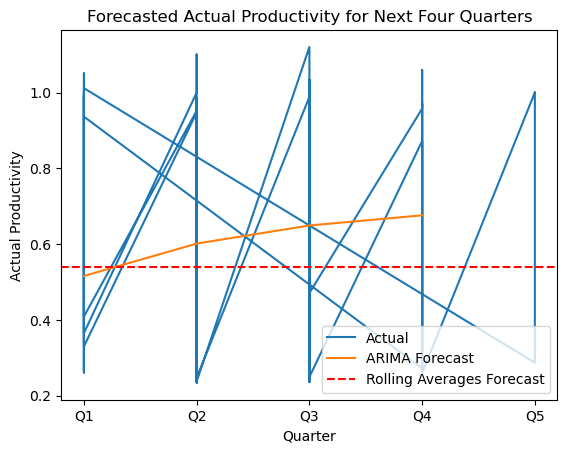

In [33]:
plt.plot(funnel['Quarter'], funnel['Actual Productivity'], label='Actual')
plt.plot(['Q1', 'Q2', 'Q3', 'Q4'], forecast_arima, label='ARIMA Forecast')
plt.axhline(y=rolling_avg, color='r', linestyle='--', label='Rolling Averages Forecast')
plt.xlabel('Quarter')
plt.ylabel('Actual Productivity')
plt.title('Forecasted Actual Productivity for Next Four Quarters')
plt.legend()
plt.show()


In [34]:
test['Actual Productivity'].mean()

0.6998978165666667

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [36]:
mse= mean_squared_error(pred,test['Actual Productivity'])
rmse=sqrt(mse)
mae = mean_absolute_error(pred, test['Actual Productivity'])
print('MAE:',mae)
print("MSE:",mse)
print('RMSE:',rmse)

MAE: 0.057452103446691244
MSE: 0.010363520995996973
RMSE: 0.10180138012815432


In [37]:
model2 = ARIMA(funnel['Actual Productivity'],order=(0,1,2))

In [38]:
model2=model2.fit()
funnel.tail()

,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
Date,,,,,,,
2015-11-03 00:00:00,Q2,Sewing,0.65,6840,57.0,0.650596,Yes
2015-11-03 00:00:00,Q2,Finishing,0.75,960,8.0,0.628333,No
2015-11-03 00:00:00,Q2,Finishing,0.65,960,8.0,0.625625,No
2015-11-03 00:00:00,Q2,Finishing,0.75,1800,15.0,0.505889,No
2015-11-03 00:00:00,Q2,Finishing,0.70,720,6.0,0.394722,No


In [39]:
index_future_dates = pd.date_range(start="2015-11-03", end="2015-12-03")
pred = model2.predict(start=len(funnel), end=len(funnel) + len(index_future_dates) - 1, typ="levels").rename("Arima Prediction")
pred.index = index_future_dates

In [40]:
print(pred)

2015-11-03    0.459748
2015-11-04    0.492993
2015-11-05    0.492993
2015-11-06    0.492993
2015-11-07    0.492993
2015-11-08    0.492993
2015-11-09    0.492993
2015-11-10    0.492993
2015-11-11    0.492993
2015-11-12    0.492993
2015-11-13    0.492993
2015-11-14    0.492993
2015-11-15    0.492993
2015-11-16    0.492993
2015-11-17    0.492993
2015-11-18    0.492993
2015-11-19    0.492993
2015-11-20    0.492993
2015-11-21    0.492993
2015-11-22    0.492993
2015-11-23    0.492993
2015-11-24    0.492993
2015-11-25    0.492993
2015-11-26    0.492993
2015-11-27    0.492993
2015-11-28    0.492993
2015-11-29    0.492993
2015-11-30    0.492993
2015-12-01    0.492993
2015-12-02    0.492993
2015-12-03    0.492993
Freq: D, Name: Arima Prediction, dtype: float64


<Axes: >

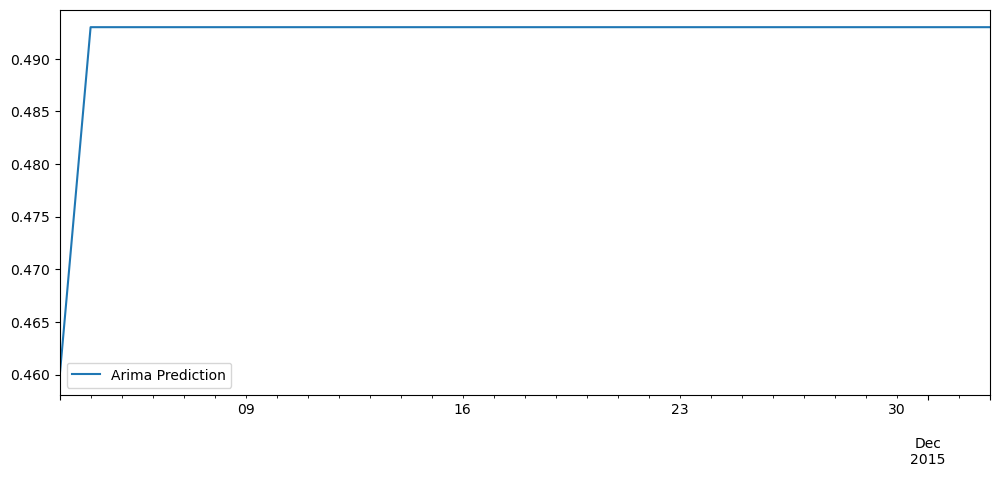

In [41]:
pred.plot(figsize=(12,5), legend=True)